In [1]:
import os

import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas.plotting import radviz
from pandas.plotting import andrews_curves
from pandas.plotting import parallel_coordinates
import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.font_manager import FontProperties
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
from scipy import stats
from scipy import integrate
from scipy.stats import norm
import seaborn as sns
from sklearn.datasets import load_iris
import networkx as nx
import folium
from folium import plugins
from PIL import Image

```python
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.figure(figsize=(7, 5))  # 创建图像区域，指定比例
```

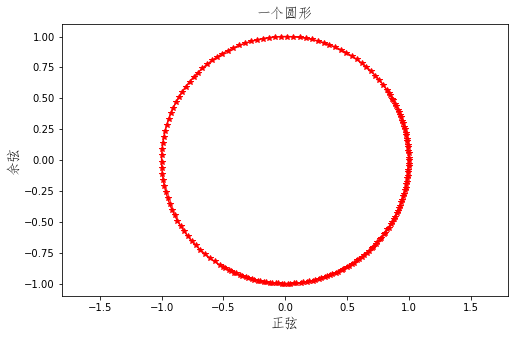

In [2]:
# 设置字体
font = FontProperties(fname="C:/Windows/Fonts/simfang.ttf", size=14)

# %matplotlib inline  # 在 jupyter 中嵌入显示
# %config InlineBackend.figure_format = 'retina'  # 呈现分辨率较高的图像

t = np.arange(1, 10, 0.05)
x = np.sin(t)
y = np.cos(t)
# 定义一个图像窗口
plt.figure(figsize=(8, 5))
# 绘制一条线
plt.plot(x, y, "r-*")
# 使坐标轴相等
plt.axis('equal')
plt.xlabel('正弦', fontproperties=font)
plt.ylabel('余弦', fontproperties=font)
plt.title('一个圆形', fontproperties=font)
# 显示图像
plt.show()

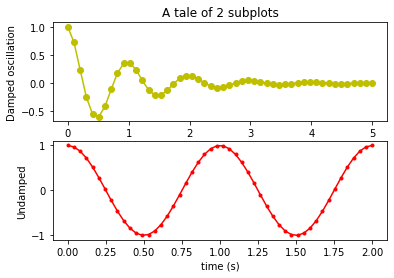

In [3]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)
# 绘制第一个子图
plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'yo-')
plt.ylabel('Damped oscillation')
plt.title('A tale of 2 subplots')
# 绘制第二个子图
plt.subplot(2, 1, 2)
plt.plot(x2, y2, 'r.-')
plt.ylabel('Undamped')
plt.xlabel('time (s)')
plt.show()

x: (10000,)


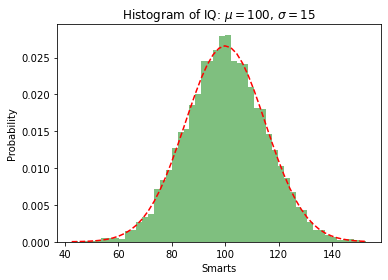

bind:
 [ 42.46618831  44.67245272  46.87871713  49.08498155  51.29124596
  53.49751037  55.70377479  57.9100392   60.11630361  62.32256803
  64.52883244  66.73509685  68.94136127  71.14762568  73.35389009
  75.56015451  77.76641892  79.97268333  82.17894775  84.38521216
  86.59147657  88.79774099  91.0040054   93.21026981  95.41653423
  97.62279864  99.82906305 102.03532747 104.24159188 106.44785629
 108.65412071 110.86038512 113.06664953 115.27291395 117.47917836
 119.68544277 121.89170719 124.0979716  126.30423601 128.51050043
 130.71676484 132.92302925 135.12929367 137.33555808 139.54182249
 141.74808691 143.95435132 146.16061573 148.36688015 150.57314456
 152.77940897]


In [4]:
# 直方图
mu = 100  # 分布的均值
sigma = 15  # 分布的标准差
x = mu + sigma * np.random.randn(10000)
print('x:', x.shape)
# 直方图的条数
mum_bins = 50
# 绘制直方图
n, bins, patches = plt.hist(x, mum_bins, density=True, facecolor='green', alpha=0.5)
# 添加一个最佳拟合和曲线
y = norm.pdf(bins, mu, sigma)  # 返回关于数据的 pdf 数值（概率密度函数）
plt.plot(bins, y, 'r--')
plt.xlabel('Smarts')
plt.ylabel('Probability')
# 在图中添加公式需要使用 latex 的语法 ($ $)
plt.title('Histogram of IQ: $\mu=100$, $\sigma=15$')
# 调整图像的间距，防止y轴数值与label重合
plt.subplots_adjust(left=0.15)
plt.show()
print('bind:\n', bins)

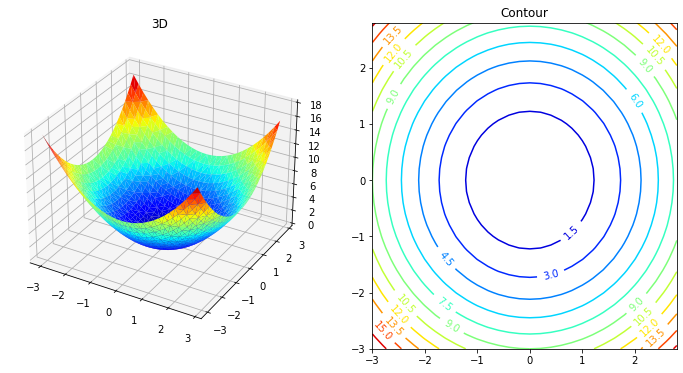

In [5]:
# 绘制三维图像
delta = 0.2
x = np.arange(-3, 3, delta)
y = np.arange(-3, 3, delta)
X, Y = np.meshgrid(x, y)
Z = X ** 2 + Y ** 2
# 返回一维的数组，但该函数只能适用于 numpy 对象（array 或者 mat）
x = X.flatten()  
y = Y.flatten()
z = Z.flatten()
fig = plt.figure(figsize=(12, 6))
axl = fig.add_subplot(121, projection='3d')
# cmap 指颜色，默认绘制位 RGB（A）颜色空间，jet 表示“蓝-青-黄-红”颜色
axl.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0.01)  
plt.title('3D')
ax2 = fig.add_subplot(122)
# X，Y，Z，15 代表的是显示等高线的密集程度，数值越大，画的等高线数就越多
cs = ax2.contour(X, Y, Z, 15, cmap='jet')
ax2.clabel(cs, inline=True, fontsize=10, fmt='%1.1f')
plt.title('Contour')
plt.show()

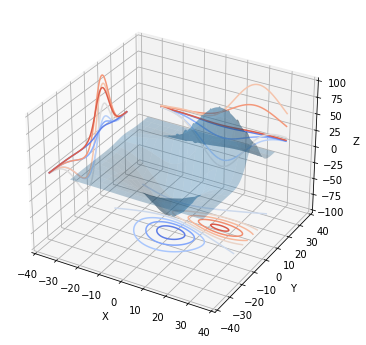

In [6]:
# 三维图像 + 各个轴的投影等高线
fig = plt.figure(figsize=(8, 6))
ax = fig.gca(projection='3d')
# 生成三维测试数据
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contour(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)
ax.set_xlabel('X')
ax.set_xlim(-40, 40)
ax.set_ylabel('Y')
ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)
plt.show()

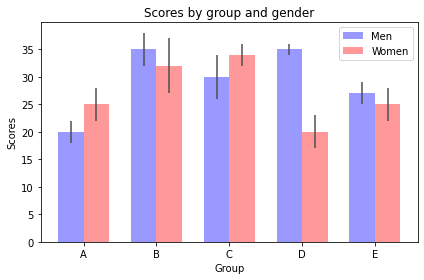

In [7]:
# 条形图
n_groups = 5
# 平均分和标准差
means_men = (20, 35, 30, 35, 27)
std_men = (2, 3, 4, 1, 2)
means_women = (25, 32, 34, 20, 25)
std_women = (3, 5, 2, 3, 3)
# 条形图
fig, ax = plt.subplots()
# 生成0，1，2，3，……
index = np.arange(n_groups)
bar_width = 0.35  # 条的宽度

opacity = 0.4
error_config = {'ecolor': '0.3'}
# 条形图中的第一类条
rectsl1 = plt.bar(index, means_men, bar_width, alpha=opacity, color='b', yerr=std_men, error_kw=error_config, label='Men')
# 条形图的第二类条
rectsl2 = plt.bar(index + bar_width, means_women, bar_width, alpha=opacity, color='r', yerr=std_women, error_kw=error_config, label='Women')

plt.xlabel('Group')
plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(index + bar_width / 2, ('A', 'B', 'C', 'D', 'E'))
plt.legend()
# 自动调整 subplot 的参数给指定的填充区
plt.tight_layout()
plt.show()

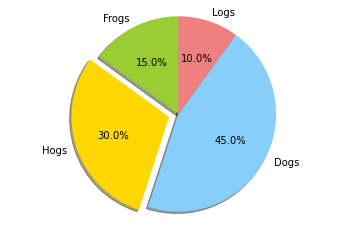

In [8]:
# 饼图
# 切片将按顺时针方向排列并绘制
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'  # 标注
sizes = [15, 30, 45, 10]  # 大小
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']  # 颜色
# 0.1代表第二个块从园中分离出来
explode = (0, 0.1, 0, 0)
# 绘制饼图
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

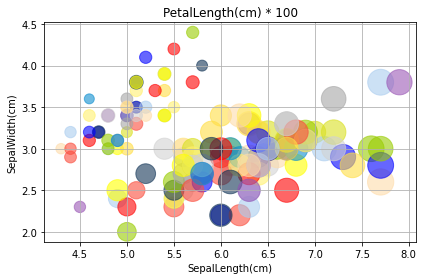

In [9]:
# 气泡图（散点图）
df_data = pd.read_csv('dataset/iris.csv')
df_data.head()
# 作图
fig, ax = plt.subplots()
colors = ['#99cc01', '#ffff01', '#0000fe', '#fe0000', '#a6a6a6', '#d9e021', '#fff16e', '#0d8ecf', '#fa4d3d', '#d2d2d2', '#ffde45', '#9b59b6', '#abcdef', '#fedcab', '#123456']
# 创建气泡图 SepalLength 为 x，SepalWidth 为 y，同时设置 PetalLength 为气泡大小，并设置颜色透明度等
ax.scatter(df_data['SepalLength'], df_data['SepalWidth'], s=df_data['PetalLength'] * 100, c=colors * 10, alpha=0.6)
ax.set_xlabel('SepalLength(cm)')
ax.set_ylabel('SepalWidth(cm)')
ax.set_title('PetalLength(cm) * 100')
# 显示网格
ax.grid(True)
fig.tight_layout()
plt.show()

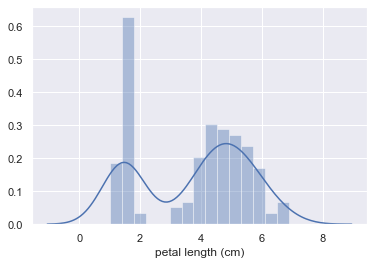

In [10]:
# Seabon 中的图例
# 直方图和密度函数
iris = load_iris()
df = DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

sns.set(color_codes=True)
sns.distplot(df['petal length (cm)'], bins=15)
plt.show()

d:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


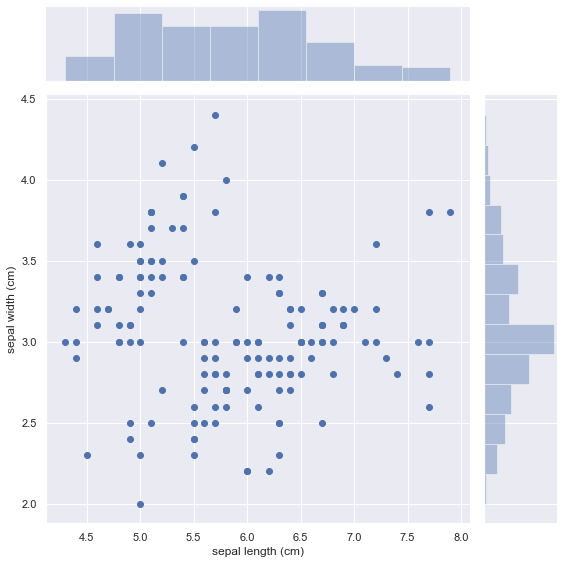

In [11]:
# 散点图和直方图
# 使用 seaborn 的 joinplot() 函数同时绘制散点图和直方图
sns.jointplot(x='sepal length (cm)', y='sepal width (cm)', data=df, size=8)
plt.show()

d:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


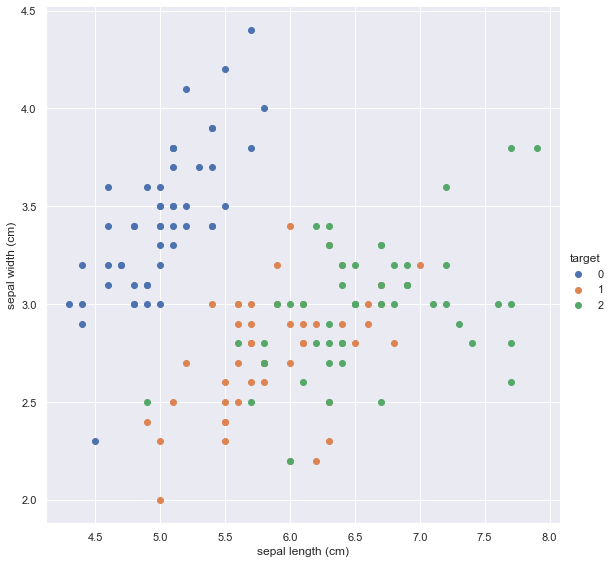

In [12]:
# 分散散点图
# 用 seaborn's FacetGrid 标记不同的种类
sns.FacetGrid(df, hue='target', size=8).map(plt.scatter, 'sepal length (cm)', 'sepal width (cm)').add_legend()
plt.show()

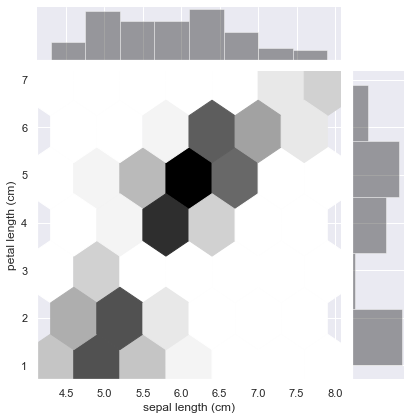

In [13]:
# 六边形图
sns.axes_style('white')
sns.jointplot(x='sepal length (cm)', y='petal length (cm)', data=df, kind='hex', color='k')
plt.show()

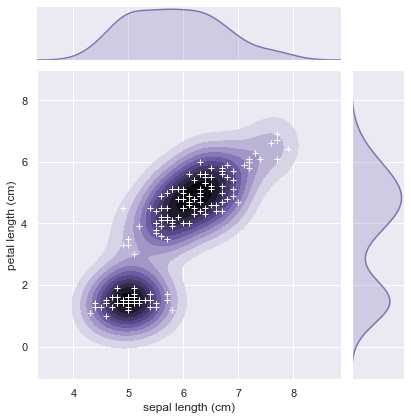

In [14]:
# 二维核密度估计图
g = sns.jointplot(x='sepal length (cm)', y='petal length (cm)', data=df, kind='kde', color='m')
# 添加散点图
g.plot_joint(plt.scatter, c='w', s=30, linewidth=1, marker='+')
g.ax_joint.collections[0].set_alpha(0)

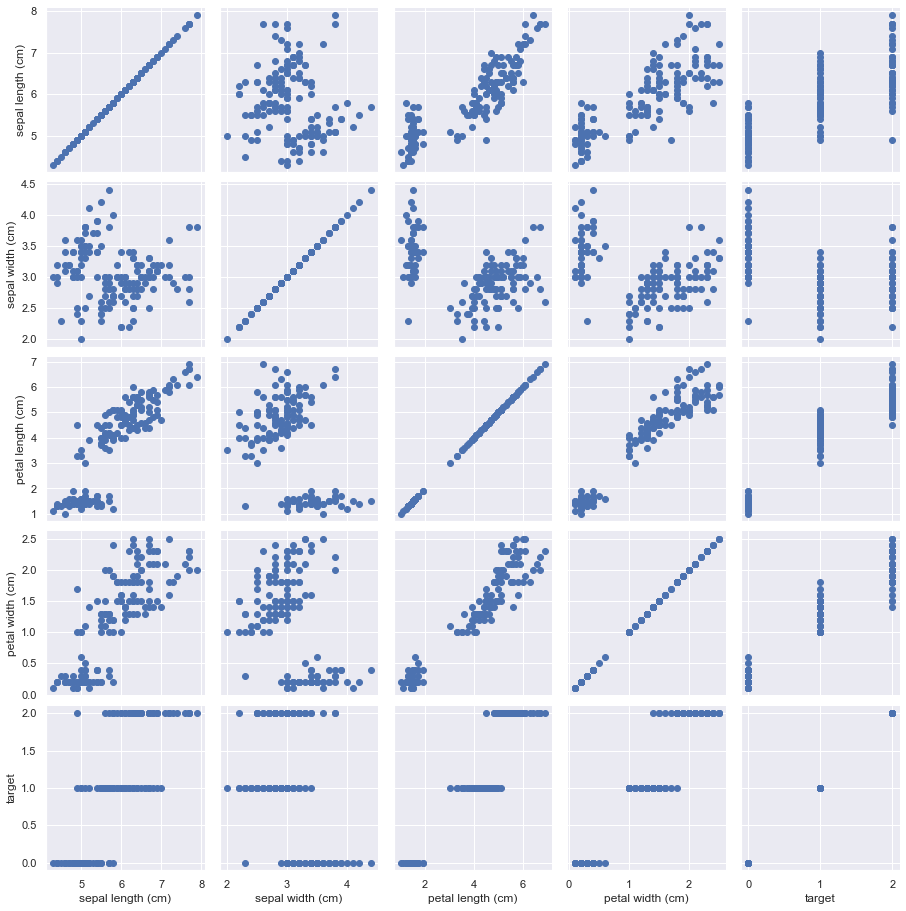

In [15]:
# 矩阵散点图
g = sns.PairGrid(df)
g.map(plt.scatter)

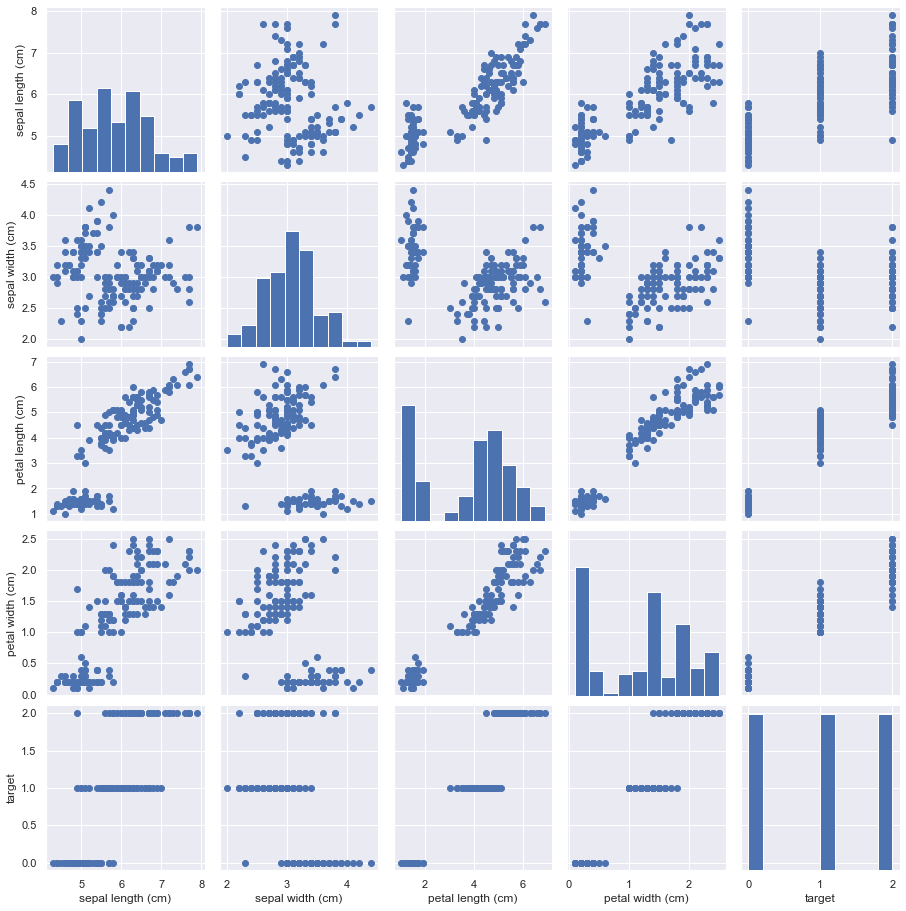

In [16]:
# 矩阵散点图
g = sns.PairGrid(df)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

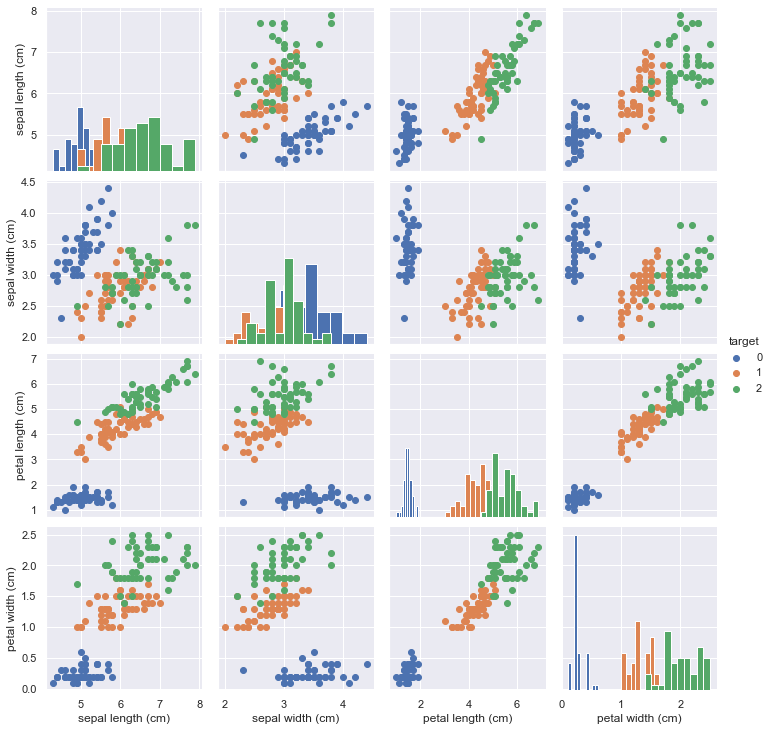

In [17]:
# 矩阵散点图 —— 分类变量绘制
g = sns.PairGrid(df, hue='target')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

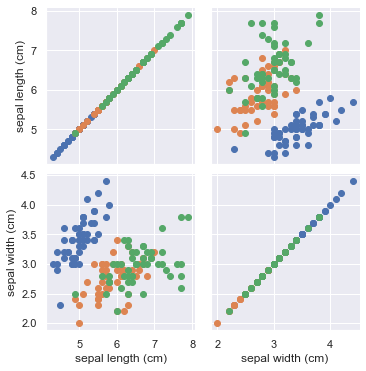

In [18]:
# 矩阵散点图 —— 特定关系绘制
g = sns.PairGrid(df, vars=['sepal length (cm)', 'sepal width (cm)'], hue='target')
g.map(plt.scatter)

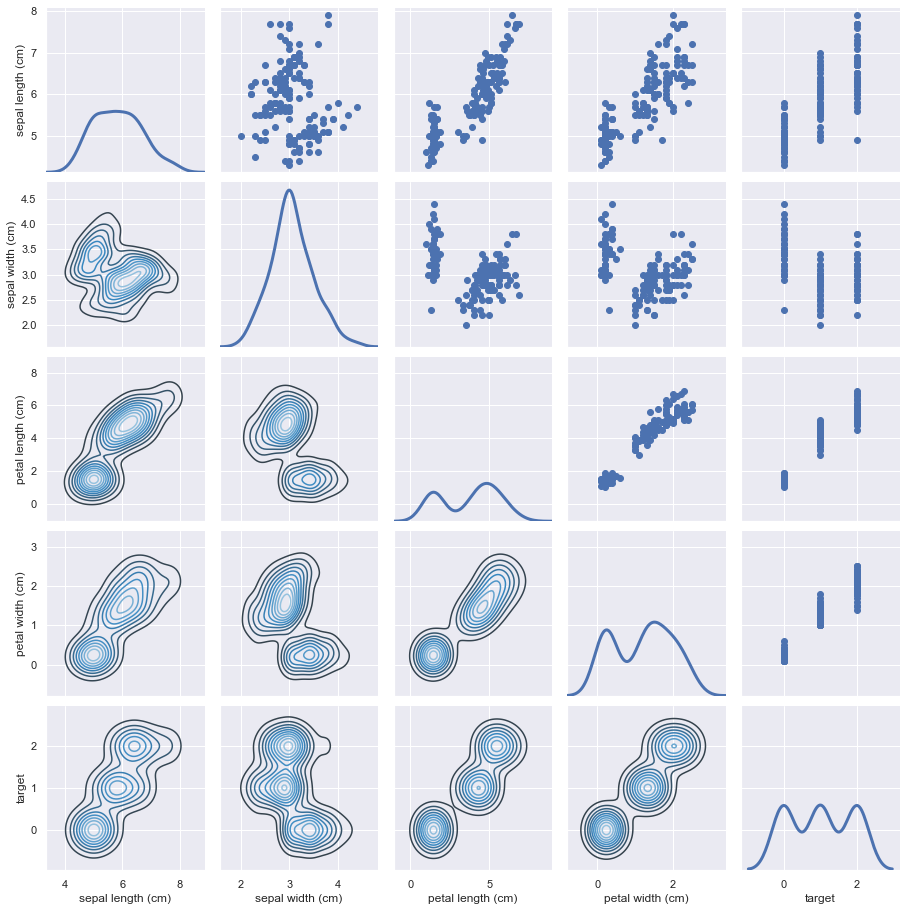

In [19]:
# 矩阵散点图 —— 多功能绘制
g = sns.PairGrid(df)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap='Blues_d')
g.map_diag(sns.kdeplot, lw=3, legend=False)

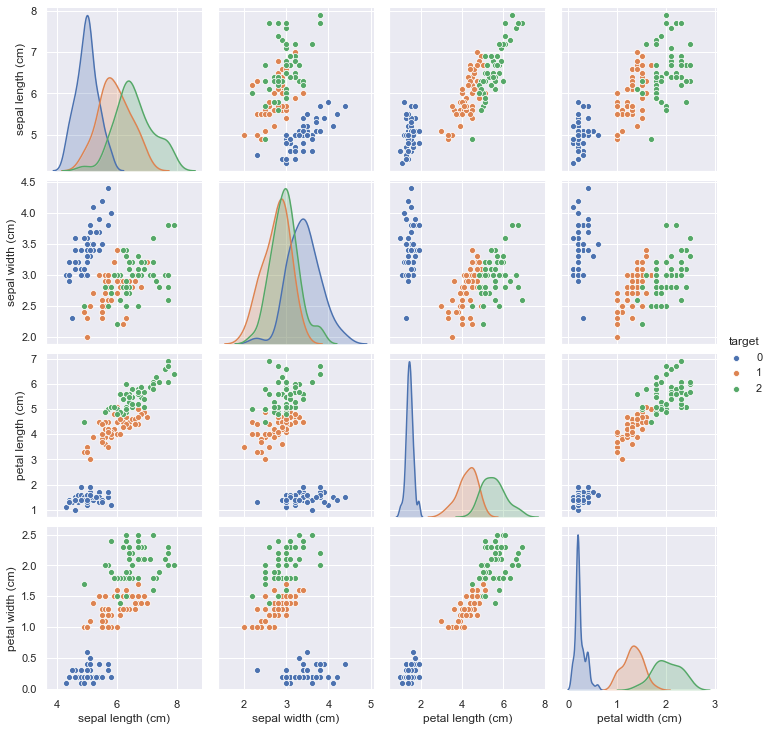

In [20]:
# 矩阵散点图 —— 对角线直方图
sns.pairplot(df, hue='target')

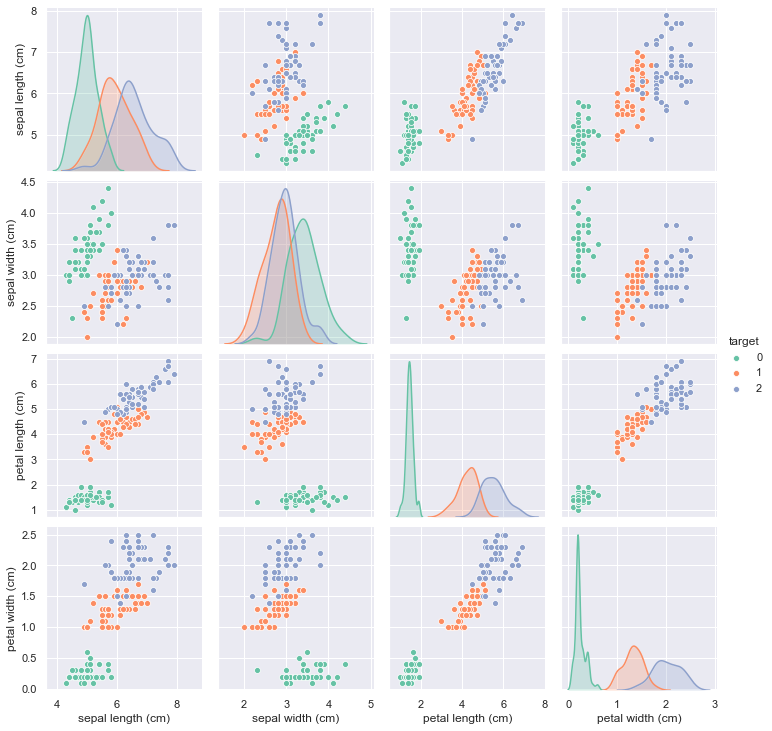

In [21]:
# 矩阵散点图 —— 关键字控制
sns.pairplot(df, hue='target', palette='Set2', diag_kind='kde')

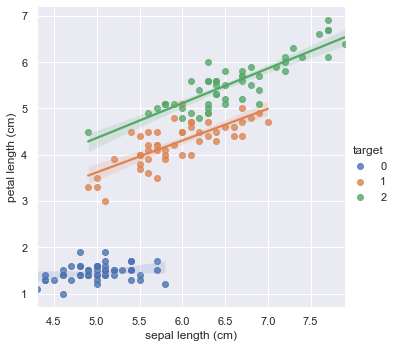

In [22]:
# 线性相关图
sns.lmplot(x='sepal length (cm)', y='petal length (cm)', data=df, hue='target')
plt.show()

<AxesSubplot:xlabel='target', ylabel='sepal length (cm)'>

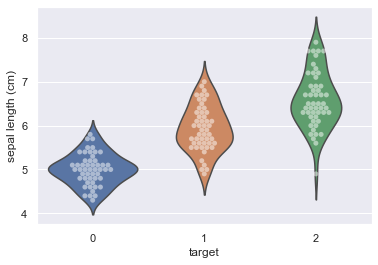

In [23]:
# 小提琴图
sns.violinplot(x='target', y='sepal length (cm)', data=df, inner=None)
# 散点图
sns.swarmplot(x='target', y='sepal length (cm)', data=df, color='w', alpha=.5)

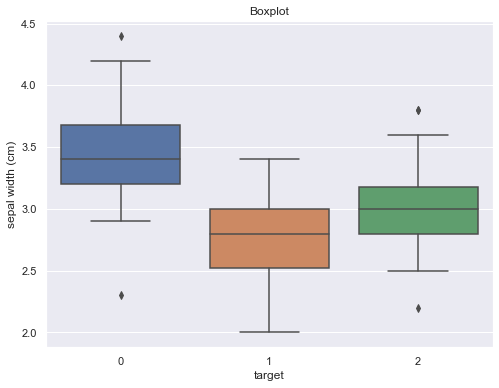

In [24]:
# 合形图
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='sepal width (cm)', data=df)
plt.title('Boxplot')
plt.show()

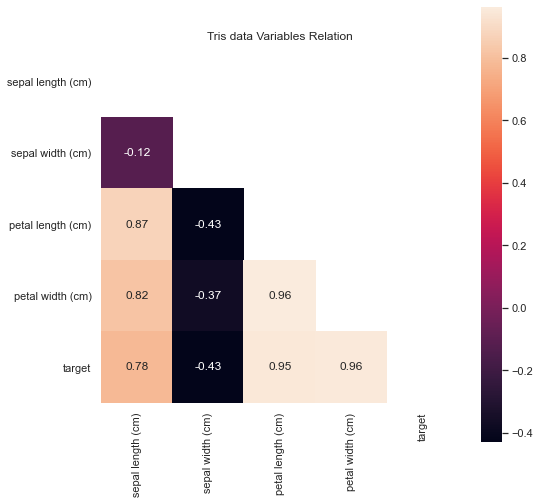

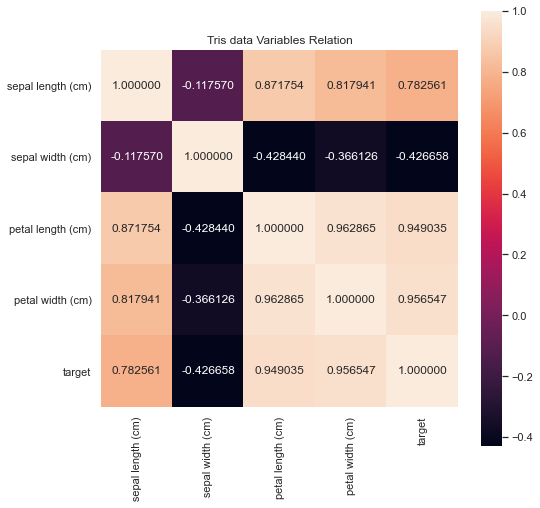

In [25]:
# 热力图
# 相关系数大小的可视化
newdata = df
datacor = np.corrcoef(newdata, rowvar=0)
datacor = pd.DataFrame(data=datacor, columns=newdata.columns, index=newdata.columns)
# 形式1
mask = np.zeros_like(datacor)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(8, 8))
with sns.axes_style('white'):
    ax = sns.heatmap(datacor, mask=mask, square=True, annot=True)
ax.set_title('Tris data Variables Relation')
plt.show()
# 形式2
plt.figure(figsize=(8, 8))
with sns.axes_style('white'):
    ax = sns.heatmap(datacor, square=True, annot=True, fmt='f')
ax.set_title('Tris data Variables Relation')
plt.show()

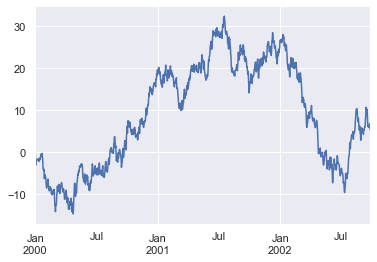

数据的前几行：
                    A         B         C         D
2000-01-01  0.211349 -0.548955 -1.479757  0.155203
2000-01-02  0.285547 -0.423181 -2.490133 -1.684607
2000-01-03  0.088642  0.207049 -2.378918 -0.282213
2000-01-04  1.295596 -0.141127 -1.663573 -0.125679
2000-01-05 -0.815076 -1.599500 -1.376986  2.599197


<Figure size 432x288 with 0 Axes>

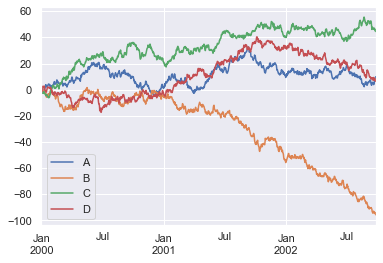

In [26]:
# 折线图
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()
plt.show()
# 多条折线图
df0 = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df0 = df0.cumsum()
print('数据的前几行：\n', df0.head())
plt.figure()
df0.plot()
plt.show()

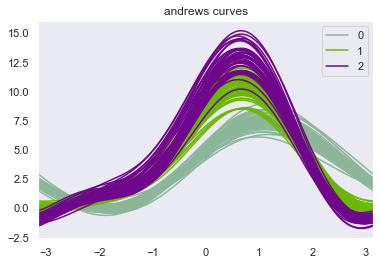

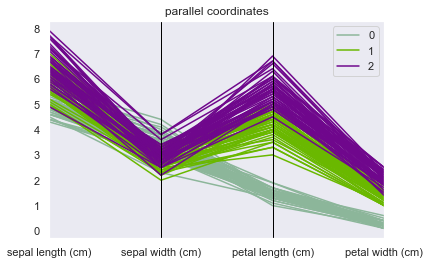

In [27]:
# 安德鲁曲线
plt.figure(figsize=(6, 4))
andrews_curves(df, 'target')
plt.title('andrews curves')
plt.show()
# 平行坐标图
plt.figure(figsize=(6, 4))
parallel_coordinates(df, 'target')
plt.title('parallel coordinates')
plt.show()

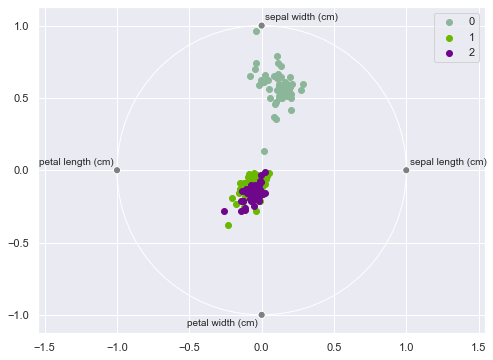

In [28]:
# 弹簧张力高维数据图
plt.figure(figsize=(8, 6))
radviz(df, 'target')
plt.show()

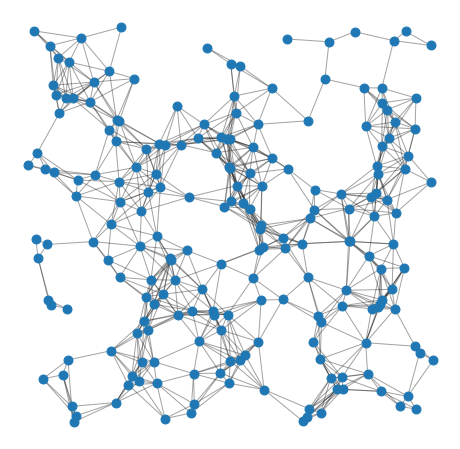

In [29]:
# 网络图
G = nx.random_geometric_graph(200, 0.125)
# 位置存储为随机几何图形的节点属性数据
pos = nx.get_node_attributes(G, 'pos')
# 查找靠近中心的节点 (0.5, 0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5) ** 2 + (y - 0.5) ** 2
    if d < dmin:
        ncenter = n
        dmin = d
# 从节点靠近中心的路径长度着色
p = nx.single_source_shortest_path_length(G, ncenter)
plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, nodelist=[ncenter], alpha=0.4)
nx.draw_networkx_nodes(G, pos, nodelist=p.keys(), node_size=80)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis('off')
plt.show()

In [30]:
# 热力地图
# 生成数据
data = (np.random.normal(size=(100, 3)) * np.array([[1, 1, 1]]) + np.array([[48, 5, 1]])).tolist()
# 绘制地图
mapa = folium.Map([48., 5.], tiles='stamentoner', zoom_start=6)
mapa.add_child(plugins.HeatMap(data))
mapa.save('Heatmap.html')

图片大小 (327, 580)


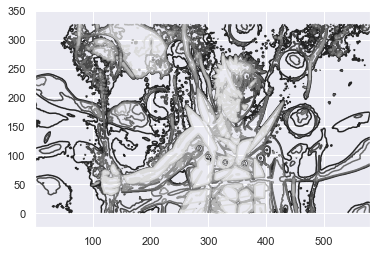

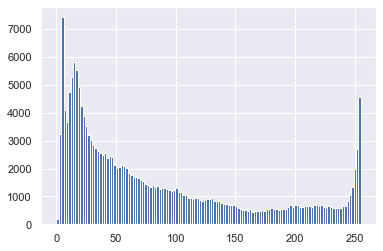

In [31]:
im = np.array(Image.open(r'C:\Users\Administrator\python\dataset\带土n.jpg').convert('L'))
print('图片大小', im.shape)
# 图片轮廓
plt.figure()
# 不适用颜色信息
plt.gray()
# 在原点的左上角显示图像轮廓
plt.contour(im, origin='image')
plt.axis('equal')
plt.show()
# 直方图
plt.hist(im.flatten(), 128)
plt.show()